In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
from scipy.stats import kurtosis

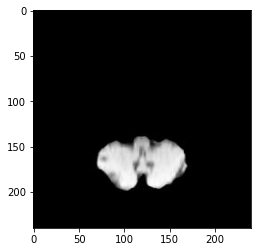

In [186]:
image=plt.imread("Brain_Tumor/Image1.jpg")
plt.imshow(image, cmap='gray')

In [187]:
size=image.size
length=len(image)
sum=image.sum()
count=size*length*length
mean=sum/count
mean=mean*100000 
mean

25.604443962191354

In [188]:
#standard-devition 
from PIL import Image, ImageStat
im = Image.open("Brain_Tumor/Image1.jpg")
stat = ImageStat.Stat(im)
std=stat.stddev
std=std[0]
std

53.41046518943892

In [189]:
#variance
var=stat.var
var=var[0]
var

2852.677791752267

In [190]:
#median
median=stat.median
median=median[0]
median

0

In [191]:
#skewness
from scipy.stats import kurtosis,skew
skewness=skew(image, axis=None)
skewness

3.5193199291454884

In [192]:
#energy
import cv2
from pywt import dwt2
import pywt
im = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
m,n = im.shape

cA, (cH, cV, cD) = pywt.dwt2(im,'db1')
# a - LL, h - LH, v - HL, d - HH as in matlab
cHsq = [[elem * elem for elem in inner] for inner in cH]
cVsq = [[elem * elem for elem in inner] for inner in cV]
cDsq = [[elem * elem for elem in inner] for inner in cD]
Energy = (np.sum(cHsq) + np.sum(cVsq) + np.sum(cDsq))/(m*n)
print (Energy)

18.245598958333343


In [193]:
data=pd.read_csv("bt_dataset_t3.csv")
data.head()


,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0


In [194]:
data.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0


In [195]:
data=data.drop(['Entropy','Kurtosis','Contrast','PSNR','SSIM','MSE','DC','ASM','Homogeneity','Dissimilarity','Correlation','Coarseness'],axis=1)

In [196]:
data.head()

,Image,Mean,Variance,Standard Deviation,Skewness,Energy,Target
0,Image1,23.448517,2538.985627,50.388348,1.984202,0.781557,1
1,Image2,4.398331,834.853030,28.893823,6.495203,0.972770,1
2,Image3,3.244263,642.059166,25.338886,7.772860,0.980161,1
3,Image4,8.511353,1126.214187,33.559115,3.763142,0.921786,0
4,Image5,21.000793,2235.316978,47.279139,1.936029,0.804184,0


In [197]:
from sklearn.model_selection import train_test_split as tts
df_train,df_test=tts(data,test_size=0.3,random_state=0)

In [198]:
y_train=df_train.pop('Target')
x_train=df_train

In [199]:
y_train.head()

114     1
1258    1
58      1
1137    1
1565    1
Name: Target, dtype: int64

In [200]:
x_train.head()

,Image,Mean,Variance,Standard Deviation,Skewness,Energy
114,Image115,1.392502,195.655369,13.987686,10.293161,0.987587
1258,Image1259,2.575943,395.476942,19.886602,7.682192,0.979795
58,Image59,7.421158,1056.104563,32.497762,4.255370,0.940451
1137,Image1138,15.215729,1594.909241,39.936315,2.372376,0.842399
1565,Image1566,0.417801,60.561491,7.782126,18.659305,0.996182


In [201]:
y_test=df_test.pop('Target')
x_test=df_test

In [202]:

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
 
print (x_train[0:10, :])

ValueError: could not convert string to float: 'Image115'

In [177]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').